In [ ]:
# Load the data
train_data = pd.read_csv(f"{working_dir}/../data/TrainData.csv")
weather_forecast = pd.read_csv(f"{working_dir}/../data/WeatherForecastInput.csv")
solution = pd.read_csv(f"{working_dir}/../data/Solution.csv")

In [ ]:
# Calculate wind direction for train_data and weather_forecast
train_data["WDIR"] = np.arctan2(train_data["V10"], train_data["U10"]) * 180 / np.pi
weather_forecast["WDIR"] = np.arctan2(weather_forecast["V10"], weather_forecast["U10"]) * 180 / np.pi

In [ ]:
# Create and fit the multiple linear regression model
X_train = train_data[["WS10", "WDIR"]]
y_train = train_data["POWER"]

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import os

In [69]:
working_dir = os.getcwd()

In [73]:
# Predict wind power generation using the MLR model
X_forecast = weather_forecast[["WS10", "WDIR"]]
y_forecast_mlr = mlr_model.predict(X_forecast)

In [74]:
# Save the forecast to a CSV file
forecast_template = pd.DataFrame({"TIMESTAMP": weather_forecast["TIMESTAMP"], "FORECAST": y_forecast_mlr})
forecast_template.to_csv(f"{working_dir}/results/ForecastTemplate2.csv", index=False)

In [75]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(solution["POWER"], y_forecast_mlr))
print("RMSE for the Multiple Linear Regression model:", rmse)

RMSE for the Multiple Linear Regression model: 0.21555971988282088


In [76]:
# Linear regression
lr_model = LinearRegression()
lr_model.fit(train_data[['WS10']], train_data['POWER'])
lr_predictions = lr_model.predict(weather_forecast[['WS10']])

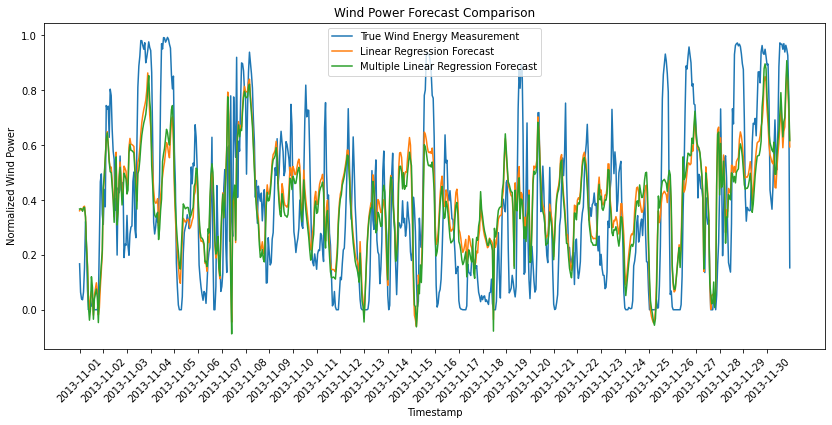

In [79]:
# Compare the forecasts
plt.figure(figsize=(14, 6))
plt.plot(solution['TIMESTAMP'], solution['POWER'], label="True Wind Energy Measurement")
plt.plot(solution['TIMESTAMP'], lr_predictions, label="Linear Regression Forecast")
plt.plot(solution['TIMESTAMP'], y_forecast_mlr, label="Multiple Linear Regression Forecast")
plt.xlabel('Timestamp')
plt.ylabel('Normalized Wind Power')
plt.title('Wind Power Forecast Comparison')
plt.legend()
plt.xticks(rotation=45)

solution['TIMESTAMP'] = pd.to_datetime(solution['TIMESTAMP'], format='%Y%m%d %H:%M')

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

n = 24  # Skip to next day (24h)
ax.set_xticks(solution['TIMESTAMP'][::n])  # Select every nth timestamp as a label

plt.show()